<a href="https://colab.research.google.com/github/ZoubirCHATTI/07_Signal_Processing/blob/main/Seismic_data_processing/01_Synthetic_seismic_data_processing/01_Synthetic_Seismic_Trace_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01_Genertion of a synthetic seismic trace**

In [1]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Text(0, 0.5, 'Amplitude')

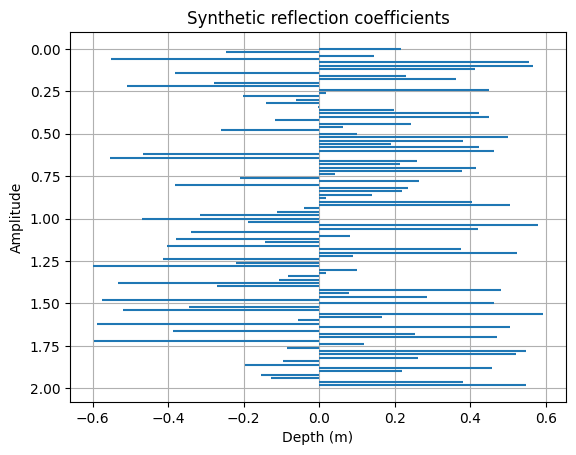

In [3]:
#Generation of reflectio coefficients

depth=np.arange(0, 2, 0.02)                                            #Two way time assumed to be of 2 s
coefficicnts=100
r=np.random.uniform(-0.6, 0.6, coefficicnts)                          #Random random coefficients generation

#plot of the reflection coefficients vs depth
plt.hlines(depth, 0, r)
plt.gca().invert_yaxis()
plt.grid(True)
plt.title('Synthetic reflection coefficients')
plt.xlabel('Depth (m)')
plt.ylabel('Amplitude')

In [4]:
#Generation of the Ricker wavelet (it could be imported using scipy)

f0=50                                                       #The central frequency definition
duration=0.2                                                #The duration of the Ricker wavelet
fs=500
t=np.linspace(-duration/2, duration/2, int(fs*duration))    #Time window of the Ricker wavelet
w=(1-2*(np.pi*f0*t)**2)*np.exp(-((np.pi*f0*t)**2))          #Definition the wavelet

Text(0.5, 1.0, 'The ricker wavelet')

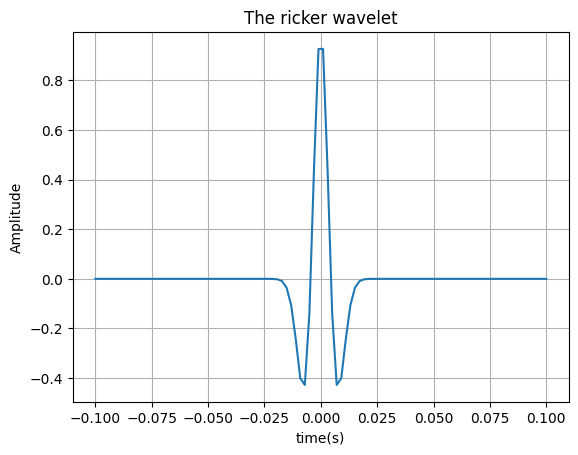

In [5]:
#Visualization of the Ricker wavelet
plt.figure()
plt.plot(t , w)
plt.grid(True)
plt.xlabel("time(s)")
plt.ylabel("Amplitude")
plt.title('The ricker wavelet')

In [6]:
#Generation of the clean synthetic seismic trace (convolution of the ricker with the reflection coefficicent)
y=np.convolve(r, w, mode='same')

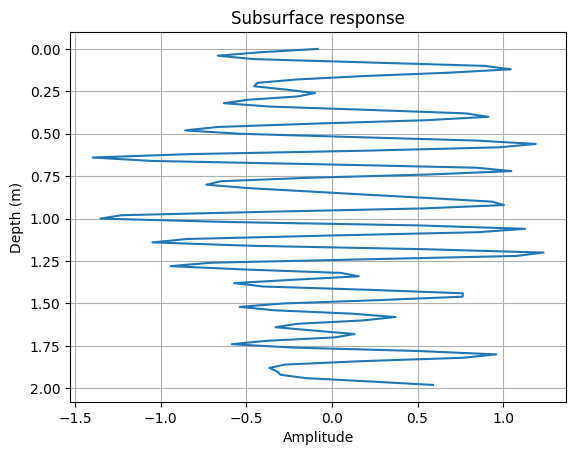

In [7]:
#Plot of the clean synthetic seismic trace (without noise)
plt.figure()
plt.plot(y, depth)
plt.gca().invert_yaxis()
plt.xlabel('Amplitude')
plt.ylabel('Depth (m)')
plt.title('Subsurface response')
plt.grid(True)

In [8]:
#Generation of gaussian noise
n=np.random.randn(100)
seismic_trace=y+n

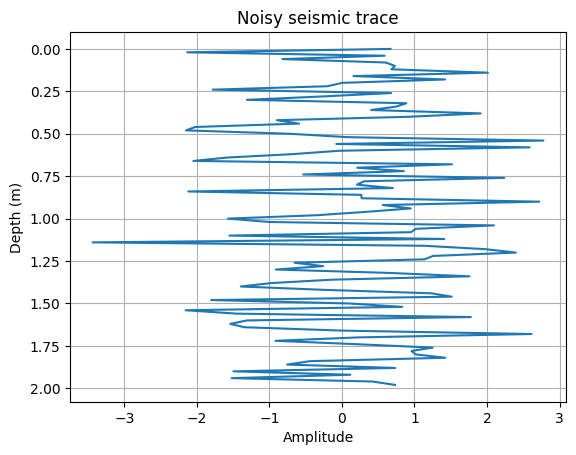

In [9]:
#PLot of the generated noisy synthetic seismic trace
plt.figure()
plt.plot(seismic_trace, depth)
plt.gca().invert_yaxis()
plt.xlabel('Amplitude')
plt.ylabel('Depth (m)')
plt.title('Noisy seismic trace')
plt.grid(True)

In [10]:
synthetic_trace=np.column_stack((depth, seismic_trace))
df=pd.DataFrame(synthetic_trace, columns=["TWT", "Amplitude"])
df.to_csv('/content/gdrive/MyDrive/FOR NEXA/synthetic_trace.csv', index=False)